For this assignment, you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you in D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. The second part of assignment 3 has 50 points.


## Exercise 
1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.



In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [249]:
titanic = pd.read_csv("titanic.csv")

In [250]:
titanic.info()
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
#titanic['Survived']= titanic['Survived'].replace([0,1],['fail','survived'])
#titanic.info()
#titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,fail,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,fail,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


Text(0, 0.5, 'Percentage')

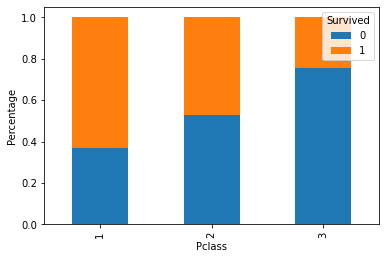

In [172]:
tab = pd.crosstab(titanic['Pclass'], titanic['Survived'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

In [195]:
#Determine if the survival rate is associated to the gender
f= titanic.loc[titanic.Sex == 'female']['Survived']
rate_women = 100*(sum(f)/len(f))
rate_women

74.20382165605095

In [191]:
m= titanic.loc[titanic.Sex == 'male']['Survived']
rate_men = 100*(sum(m)/len(m))
rate_men

18.890814558058924

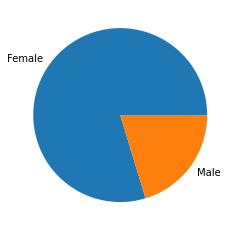

In [175]:
y = np.array([rate_women,rate_men])
plt.pie(y,labels=['Female', 'Male'])
plt.show()

Survived    0    1
Sex               
female     81  233
male      468  109


Text(0, 0.5, 'Percentage')

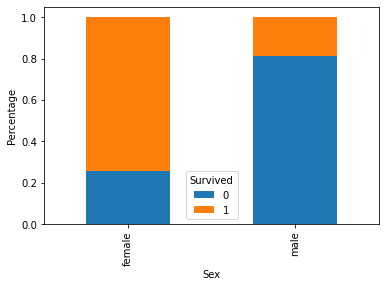

In [196]:
tab = pd.crosstab(titanic['Sex'], titanic['Survived'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Sex')
plt.ylabel('Percentage')

In [176]:
#Replacing mean value to observations with null in Age columns
a=titanic['Age'].mean()
titanic['Age'].fillna(value=a,inplace=True)

In [177]:
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
titanic['AgeGroup'] = pd.cut(titanic.Age, range(0, 81, 10), right=False, labels=age_labels)

<AxesSubplot:xlabel='AgeGroup'>

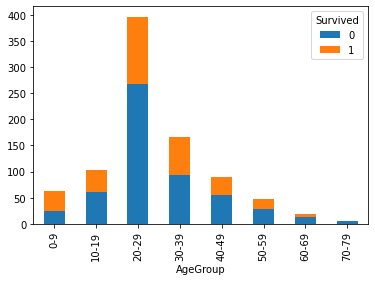

In [189]:
#Determine the survival rate is associated to the age
stackbar = titanic.groupby(['AgeGroup', 'Survived'])['AgeGroup'].count().unstack('Survived').fillna(0)
stackbar.plot(kind='bar', stacked=True)

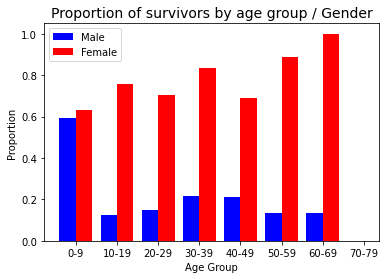

In [220]:
male_data = titanic[titanic.Sex == "male"].groupby('AgeGroup').Survived.mean().values
female_data = titanic[titanic.Sex == "female"].groupby('AgeGroup').Survived.mean().values
ax = plt.subplot()
tick_spacing = np.array(range(len(age_labels)))+0.2
male_plt_position = np.array(range(len(age_labels)))
female_plt_position = np.array(range(len(age_labels)))+0.4
ax.bar(male_plt_position, male_data,width=0.4,label='Male',color='b')
ax.bar(female_plt_position, female_data,width=0.4,label='Female',color='r')
plt.xticks(tick_spacing,  age_labels)
ax.set_ylabel("Proportion")
ax.set_xlabel("Age Group")
ax.set_title("Proportion of survivors by age group / Gender",fontsize=14)
plt.legend(loc='best')
plt.show()

In [221]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


### Github & D2L Submissions
Please create a **public** github repo and submit your answers on both **public github** and on **D2L**. Please include the link to your github repo in your submission. 

**Please follow the below guidelines regarding your github repository:**

The folder structure of your github account should be as followed:
                    
    ├── src                     # Source files (your python code)
    ├── data                    # Data related to the project (titanic.csv)
    ├── result                  # Result of the project (e.g., plots, reports)
    └── doc                     # Documentation files (additional documentations)

You must add **README.md** file to the root repository of your GitHub and explain all the directories in your GitHub repo in README file. Please look at this link as a [reference](https://help.github.com/en/github/creating-cloning-and-archiving-repositories/about-readmes) on how to write the README file.

Here is another great resource for organizing your folder and code on github. Reso

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, your final report and the structure of your github repo. 